https://www.kaggle.com/code/alifarahmandfar/mobile-price-prediction-classification-models#6.-Model-Building

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 11.7 MB/s eta 0:00:00


# Imports

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

from torchmetrics import Accuracy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!cp /content/drive/MyDrive/DeepLearning02/session1classification/mobile_price.zip /content

In [6]:
!unzip /content/mobile_price.zip

Archive:  /content/mobile_price.zip
  inflating: test.csv                
  inflating: train.csv               


In [7]:
df = pd.read_csv('/content/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
X = df.drop('price_range', axis=1)
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [9]:
y = df['price_range']
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

# T & V Split

In [10]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, random_state=42)

In [11]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
836,902,1,0.6,1,0,0,63,0.7,122,5,14,364,1360,3654,18,8,15,0,1,1
575,1197,1,0.5,1,9,0,20,0.1,129,5,10,214,1710,2885,19,7,14,1,1,1
557,1519,0,2.1,0,0,0,32,0.7,200,1,10,168,1239,2912,11,10,15,1,1,0
1235,1971,1,0.5,1,0,0,40,0.3,186,7,19,485,922,571,8,7,17,1,1,0
1360,882,0,0.7,1,9,1,28,0.2,151,6,16,248,884,751,19,11,8,1,0,1


In [12]:
x_train.shape

(1400, 20)

# Preprocessing

## Convert array to tensor

### Train

In [61]:
x_train.values

array([[9.020e+02, 1.000e+00, 6.000e-01, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [1.197e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.519e+03, 0.000e+00, 2.100e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.829e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [1.927e+03, 0.000e+00, 9.000e-01, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [6.350e+02, 1.000e+00, 6.000e-01, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [13]:
x_train = torch.FloatTensor(x_train.values)
y_train = torch.LongTensor(y_train.values)

In [14]:
y_train

tensor([3, 2, 2,  ..., 2, 3, 1])

### Validation

In [15]:
x_valid = torch.FloatTensor(x_valid.values)
y_valid = torch.LongTensor(y_valid.values)

## Standardization

In [16]:
mu = x_train.mean(dim=0)
std = x_train.std(dim=0)

In [17]:
mu, std

(tensor([1.2403e+03, 4.9357e-01, 1.5257e+00, 5.2357e-01, 4.2664e+00, 5.2786e-01,
         3.2241e+01, 5.0671e-01, 1.4064e+02, 4.5664e+00, 9.9000e+00, 6.3942e+02,
         1.2463e+03, 2.1226e+03, 1.2185e+01, 5.6521e+00, 1.0949e+01, 7.6429e-01,
         5.0429e-01, 4.9929e-01]),
 tensor([4.4307e+02, 5.0014e-01, 8.2512e-01, 4.9962e-01, 4.3234e+00, 4.9940e-01,
         1.8257e+01, 2.8797e-01, 3.5326e+01, 2.2958e+00, 6.0214e+00, 4.3995e+02,
         4.3039e+02, 1.0827e+03, 4.2240e+00, 4.3647e+00, 5.4904e+00, 4.2460e-01,
         5.0016e-01, 5.0018e-01]))

In [18]:
x_train = (x_train - mu) / std
x_valid = (x_valid - mu) / std

# Dataloader

## Train

In [19]:
train_data = TensorDataset(x_train, y_train)
train_data

In [21]:
train_data.tensors[0]

tensor([[-0.7636,  1.0126, -1.1219,  ..., -1.8000,  0.9911,  1.0011],
        [-0.0978,  1.0126, -1.2431,  ...,  0.5551,  0.9911,  1.0011],
        [ 0.6289, -0.9869,  0.6960,  ...,  0.5551,  0.9911, -0.9982],
        ...,
        [ 1.3286,  1.0126, -1.2431,  ...,  0.5551, -1.0082,  1.0011],
        [ 1.5498, -0.9869, -0.7583,  ..., -1.8000,  0.9911,  1.0011],
        [-1.3662,  1.0126, -1.1219,  ...,  0.5551, -1.0082, -0.9982]])

In [22]:
train_loader = DataLoader(train_data, 100, True)

In [23]:
len(train_loader)

14

In [24]:
train_loader_iter = iter(train_loader)

In [25]:
next(train_loader_iter)

[tensor([[ 0.6447, -0.9869,  0.6960,  ...,  0.5551,  0.9911, -0.9982],
         [ 1.6874,  1.0126, -1.2431,  ...,  0.5551, -1.0082, -0.9982],
         [-1.5671,  1.0126,  1.3020,  ..., -1.8000,  0.9911, -0.9982],
         ...,
         [ 0.3242,  1.0126,  1.5444,  ...,  0.5551, -1.0082,  1.0011],
         [-1.4385,  1.0126,  1.1808,  ..., -1.8000, -1.0082,  1.0011],
         [-0.7320,  1.0126,  1.3020,  ..., -1.8000,  0.9911, -0.9982]]),
 tensor([2, 3, 1, 2, 3, 3, 2, 1, 3, 3, 1, 2, 2, 1, 0, 2, 3, 2, 0, 2, 2, 1, 1, 2,
         1, 0, 3, 1, 2, 0, 3, 1, 3, 0, 2, 1, 0, 1, 0, 0, 1, 1, 3, 1, 3, 0, 3, 3,
         1, 3, 2, 1, 1, 3, 3, 1, 0, 0, 0, 1, 1, 2, 0, 3, 3, 0, 2, 1, 2, 2, 1, 0,
         3, 1, 2, 0, 0, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 3, 2, 0, 1, 0, 0, 1, 0, 3,
         1, 1, 3, 0])]

In [26]:
x_batch, y_batch = next(iter(train_loader))

In [27]:
x_batch.shape

torch.Size([100, 20])

## Validation

In [28]:
valid_dataset = TensorDataset(x_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size=200, shuffle=False)

# Model

In [29]:
num_feats = 20
num_class = 4
h1 = 128
h2 = 256
h3 = 64

model = nn.Sequential(nn.Linear(num_feats, h1),
                      nn.ReLU(),
                      nn.Linear(h1, h2),
                      nn.ReLU(),
                      nn.Linear(h2, h3),
                      nn.ReLU(),
                      nn.Linear(h3, num_class))

In [30]:
model

Sequential(
  (0): Linear(in_features=20, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=4, bias=True)
)

In [31]:
yp = model(x_batch)

In [35]:
yp

tensor([[ 0.0903,  0.0041,  0.1414,  0.0578],
        [ 0.1019,  0.0364,  0.0981,  0.0942],
        [ 0.0892,  0.0349,  0.1040,  0.1092],
        [ 0.0727,  0.0358,  0.1014,  0.0979],
        [ 0.0770,  0.0354,  0.1065,  0.1211],
        [ 0.1055,  0.0389,  0.1380,  0.0906],
        [ 0.0709,  0.0247,  0.0719,  0.0902],
        [ 0.0643,  0.0580,  0.0651,  0.0864],
        [ 0.0938,  0.0149,  0.0937,  0.0757],
        [ 0.0851,  0.0310,  0.1213,  0.0849],
        [ 0.0735,  0.0051,  0.0855,  0.0922],
        [ 0.0462,  0.0510,  0.0594,  0.1123],
        [ 0.0632,  0.0076,  0.1012,  0.0927],
        [ 0.0916,  0.0539,  0.0845,  0.0723],
        [ 0.1044,  0.0411,  0.1037,  0.1067],
        [ 0.0940, -0.0122,  0.1044,  0.1313],
        [ 0.1153,  0.0137,  0.1087,  0.1099],
        [ 0.0946,  0.0367,  0.1004,  0.0847],
        [ 0.0694,  0.0179,  0.0746,  0.0842],
        [ 0.0898,  0.0023,  0.0910,  0.1177],
        [ 0.0534,  0.0440,  0.1190,  0.0869],
        [ 0.0898,  0.0320,  0.0976

In [36]:
next(iter(model.parameters()))

Parameter containing:
tensor([[ 0.0920, -0.1913, -0.0985,  ..., -0.0510,  0.1240,  0.0345],
        [-0.2169, -0.0168,  0.1384,  ...,  0.1380,  0.1018, -0.1753],
        [-0.1418, -0.0098,  0.1848,  ..., -0.1945, -0.2055, -0.1875],
        ...,
        [ 0.0228, -0.0689, -0.1814,  ...,  0.1582, -0.1889, -0.0533],
        [ 0.1201, -0.1494, -0.0959,  ...,  0.1281, -0.2035,  0.0586],
        [ 0.1733, -0.1834,  0.1643,  ..., -0.0546,  0.2110, -0.1222]],
       requires_grad=True)

In [37]:
def params_nums(model):
  return torch.tensor([torch.numel(p) for p in model.parameters()]).sum()

In [38]:
params_nums(model)

tensor(52420)

In [39]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0920, -0.1913, -0.0985,  ..., -0.0510,  0.1240,  0.0345],
         [-0.2169, -0.0168,  0.1384,  ...,  0.1380,  0.1018, -0.1753],
         [-0.1418, -0.0098,  0.1848,  ..., -0.1945, -0.2055, -0.1875],
         ...,
         [ 0.0228, -0.0689, -0.1814,  ...,  0.1582, -0.1889, -0.0533],
         [ 0.1201, -0.1494, -0.0959,  ...,  0.1281, -0.2035,  0.0586],
         [ 0.1733, -0.1834,  0.1643,  ..., -0.0546,  0.2110, -0.1222]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0494,  0.1485,  0.2041, -0.2232, -0.1603,  0.1342, -0.0096, -0.0578,
          0.1927,  0.1661, -0.1201, -0.1532, -0.1557,  0.1655, -0.1889,  0.0544,
          0.1912,  0.0719, -0.0930,  0.1932,  0.1224, -0.1797,  0.1349, -0.2165,
         -0.1519,  0.1522,  0.1827,  0.1050, -0.0313, -0.1407,  0.0264, -0.0031,
          0.0430, -0.1821,  0.1985,  0.1623, -0.0437,  0.1614, -0.1129, -0.1928,
          0.0707, -0.0836, -0.1526, -0.1548, -0.1838, -0.0654,  0.0072,  0.0891

# Loss and Optimizer

In [40]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Device

In [41]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [42]:
device

'cpu'

In [43]:
model = model.to(device)

# **Utils**

## AVG meter

In [45]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

# Train Loop (CLS only)

In [46]:
num_epochs = 400

loss_train_hist = []
loss_valid_hist = []

acc_train_hist = []
acc_valid_hist = []

for epoch in range(num_epochs):
  loss_train = AverageMeter()
  acc_train = Accuracy(task='multiclass', num_classes=4).to(device)
  for i, (inputs, targets) in enumerate(train_loader):
    inputs = inputs.to(device)
    targets = targets.to(device)

    outputs = model(inputs)

    loss = loss_fn(outputs, targets)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    loss_train.update(loss.item())
    acc_train(outputs, targets)

  with torch.no_grad():
    loss_valid = AverageMeter()
    acc_valid = Accuracy(task='multiclass', num_classes=4).to(device)
    for i, (inputs, targets) in enumerate(valid_loader):
      inputs = inputs.to(device)
      targets = targets.to(device)

      outputs = model(inputs)
      loss = loss_fn(outputs, targets)

      loss_valid.update(loss.item())
      acc_valid(outputs, targets)

  loss_train_hist.append(loss_train.avg)
  loss_valid_hist.append(loss_valid.avg)

  acc_train_hist.append(acc_train.compute())
  acc_valid_hist.append(acc_valid.compute())

  if epoch % 10 == 0:
    print(f'Epoch {epoch}')
    print(f'Train: Loss = {loss_train.avg:.4}, Acc = {acc_train.compute():.4}')
    print(f'Valid: Loss = {loss_valid.avg:.4}, Acc = {acc_valid.compute():.4}')
    print()

Epoch 0
Train: Loss = 1.387, Acc = 0.2371
Valid: Loss = 1.386, Acc = 0.2433

Epoch 10
Train: Loss = 1.379, Acc = 0.3779
Valid: Loss = 1.38, Acc = 0.3433

Epoch 20
Train: Loss = 1.369, Acc = 0.4507
Valid: Loss = 1.37, Acc = 0.4183

Epoch 30
Train: Loss = 1.348, Acc = 0.5171
Valid: Loss = 1.351, Acc = 0.4967

Epoch 40
Train: Loss = 1.304, Acc = 0.5457
Valid: Loss = 1.306, Acc = 0.5383

Epoch 50
Train: Loss = 1.197, Acc = 0.5321
Valid: Loss = 1.196, Acc = 0.54

Epoch 60
Train: Loss = 0.9897, Acc = 0.5493
Valid: Loss = 0.983, Acc = 0.5667

Epoch 70
Train: Loss = 0.7803, Acc = 0.695
Valid: Loss = 0.7735, Acc = 0.7267

Epoch 80
Train: Loss = 0.6181, Acc = 0.8407
Valid: Loss = 0.6151, Acc = 0.84

Epoch 90
Train: Loss = 0.4884, Acc = 0.8857
Valid: Loss = 0.4914, Acc = 0.8783

Epoch 100
Train: Loss = 0.3896, Acc = 0.9114
Valid: Loss = 0.3998, Acc = 0.9017

Epoch 110
Train: Loss = 0.3163, Acc = 0.9307
Valid: Loss = 0.3347, Acc = 0.9117

Epoch 120
Train: Loss = 0.2627, Acc = 0.9386
Valid: Loss = 

# Monitoring model performance

## Loss curve

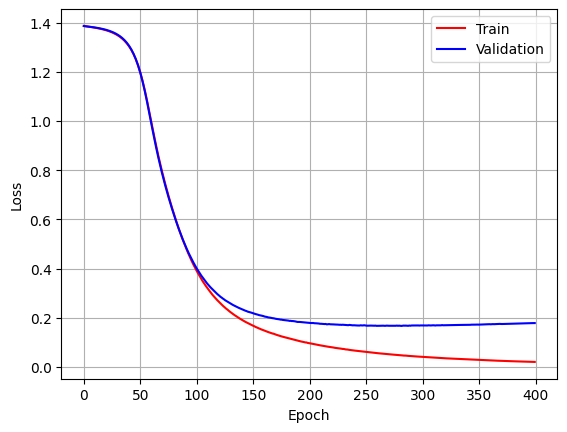

In [47]:
plt.plot(range(num_epochs), loss_train_hist, 'r-', label='Train')
plt.plot(range(num_epochs), loss_valid_hist, 'b-', label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

## Accuracy plot

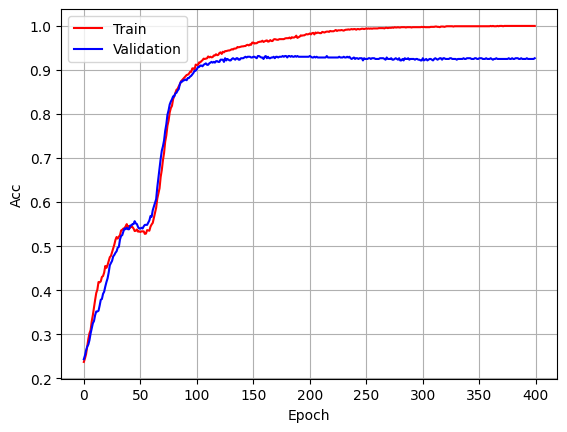

In [48]:
plt.plot(range(num_epochs), acc_train_hist, 'r-', label='Train')
plt.plot(range(num_epochs), acc_valid_hist, 'b-', label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.grid(True)
plt.legend()

# Save and load model

In [49]:
torch.save(model, 'model.pth')

In [50]:
mymodel = torch.load('model.pth')

In [51]:
mymodel

Sequential(
  (0): Linear(in_features=20, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=4, bias=True)
)